# Mooring Synthesis of Initial NC data (offline)

## 23BS-2C

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

In [2]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [3]:
# ncfiles = '/Users/bell/ecoraid/2023/Moorings/23bs2a/final_data_cf/*.nc'
ncfiles = '23bs*.nc'
mfd = xa.open_mfdataset(ncfiles, chunks=None)
mfd

<xarray.Dataset>
Dimensions:             (time: 542461, latitude: 1, longitude: 1, depth: 7)
Coordinates:
  * time                (time) datetime64[ns] 2023-08-29 ... 2024-09-08T17:00:00
  * latitude            (latitude) float64 56.86
  * longitude           (longitude) float64 -164.1
  * depth               (depth) float64 12.0 14.0 22.0 23.0 44.0 45.0 54.0
Data variables: (12/13)
    chlor_fluorescence  (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 3, 1, 1), meta=np.ndarray>
    temperature         (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    conductivity        (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    salinity            (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    current_speed       (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    u_curr_comp         (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    ...                  ...
    oxy_conc            (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    oxy_percentsat      (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    pressure            (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    oxy_conc_umkg       (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    oxy_temperature     (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
    par                 (time, depth, latitude, longitude) float64 dask.array<chunksize=(542461, 7, 1, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      56 51.630 N
    Longitude_DegMMddN:                     164 03.290 W
    MooringID:                              23BS-2C
    platform_deployment_date:               2023-08-29T00:00:00Z
    platform_deployment_cruise_name:        AQ2301
    platform_recovery_date:                 2024-09-08T17:00:00Z
    ...                                     ...
    InstrumentSerialNumber:                 027
    InstrumentType:                         Eco-Fluorometer FLS
    date_created:                           2024-09-17T12:51:05Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.\nTrimmed t...

## Temperature (full temporal resolution)

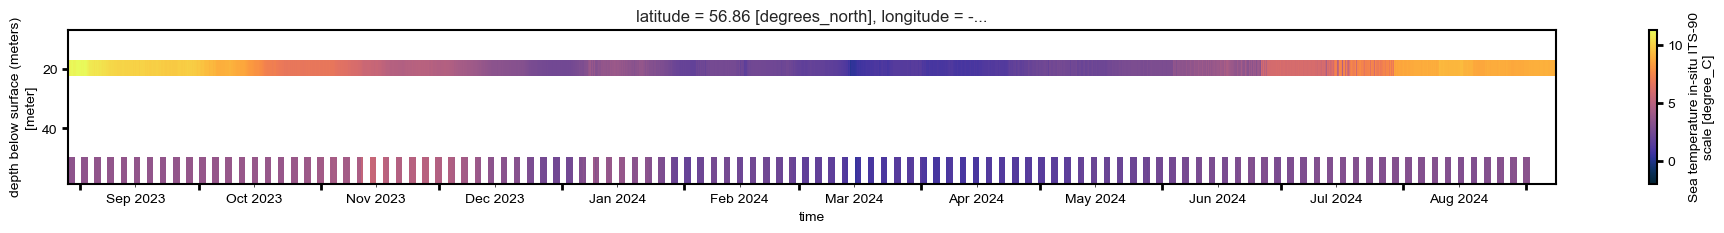

In [18]:
upper_temp = mfd.temperature.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(24, 2))
mfd.temperature.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.thermal)


ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

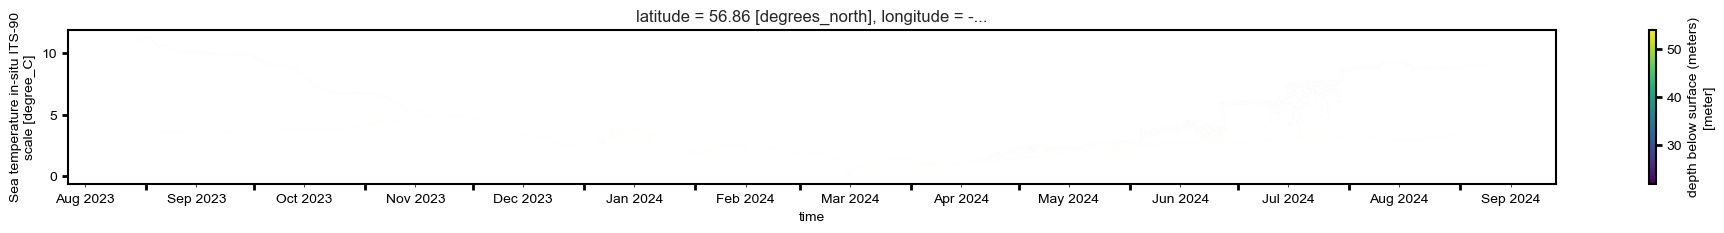

In [19]:
fig, ax = plt.subplots(1,figsize=(24, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="temperature",hue="depth",s=1,ax=ax)


ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

**Note:** not everything has constant sample frequencies so if nan's are in the mix, then lineplots are less useful (see plot below)
Will want to resample to hourly or daily to evaluate those

In [20]:
import datetime

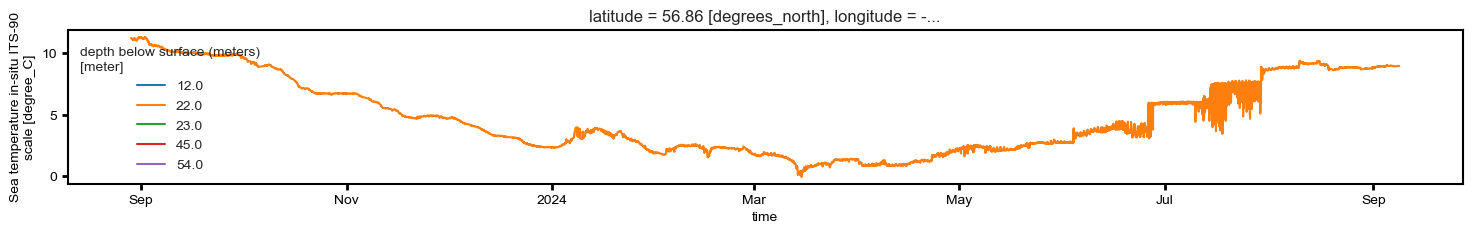

In [21]:
fig, ax = plt.subplots(1,figsize=(18, 2))
mfd.temperature.isel(latitude=0,longitude=0).plot.line(x="time",hue="depth",ax=ax);

## Salinity(full temporal resolution)

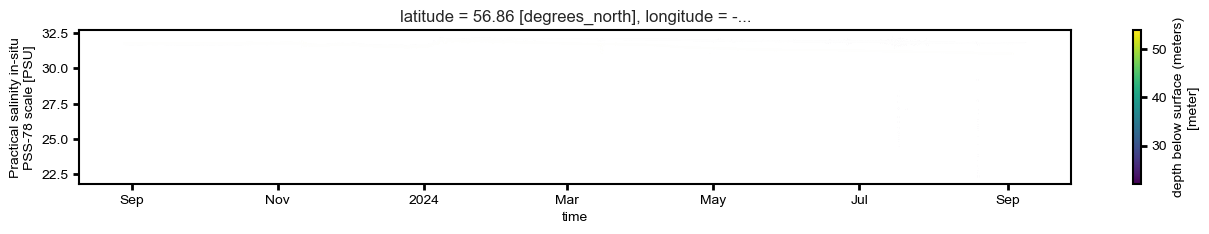

In [22]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="salinity",hue="depth",s=1,ax=ax)

## Pressure (full temporal resolution)

KeyError: "No variable named 'pressure'. Variables on the dataset include ['time', 'latitude', 'longitude', 'depth', 'chlor_fluorescence', ..., 'oxy_conc', 'oxy_temperature', 'par', 'oxy_percentsat', 'oxy_conc_umkg']"

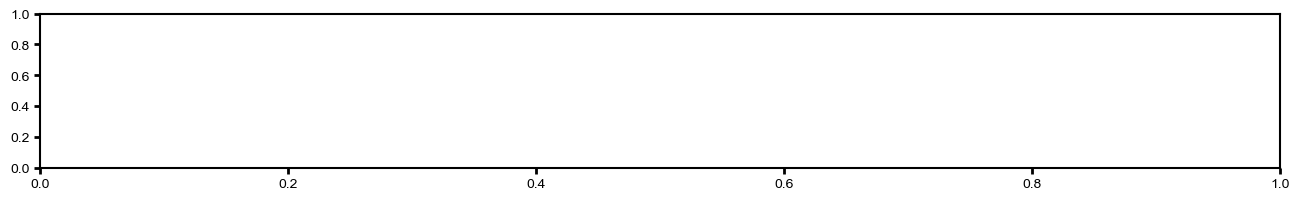

In [23]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="pressure",hue="depth",s=1,ax=ax)

## Hourly/Interpolated plots Plots

Because of the different timebases... quickly either interpolate (linearly) or downsample (this seems slower) to plot all series

In [4]:
# mfd_hourly = mfd.resample(time='1H').median() #not fast
mfd_up = (mfd.interpolate_na("time")).resample({'time':'1H'}).mean()

IOStream.flush timed out
IOStream.flush timed out


NameError: name 'datetime' is not defined

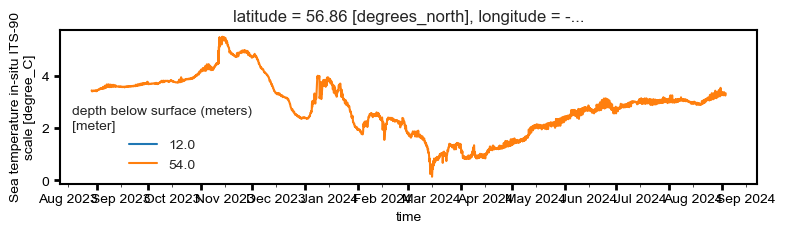

In [5]:
fig, ax = plt.subplots(1,figsize=(9, 2))
mfd_up.temperature.isel({'depth':[0,-1]}).plot(x="time",hue="depth",ax=ax) #<- top/bottom select

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim(datetime.date(2024,4,20),datetime.date(2024,9,10)) #<- defined temp window

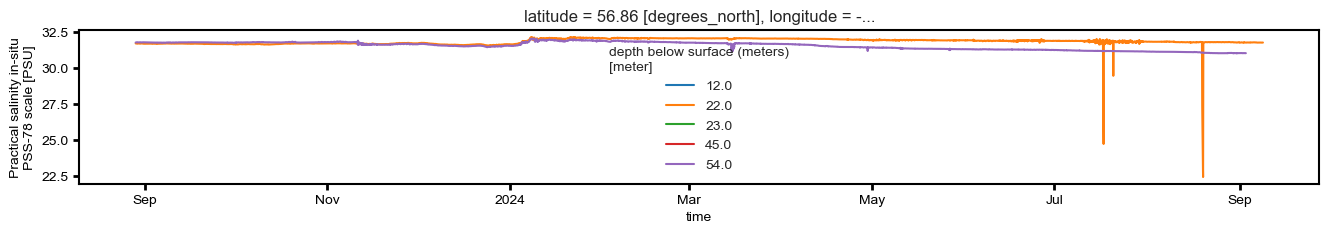

In [26]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.salinity.plot(x="time",hue="depth",ax=ax);
# ax.set_ylim([30.5,33.5])

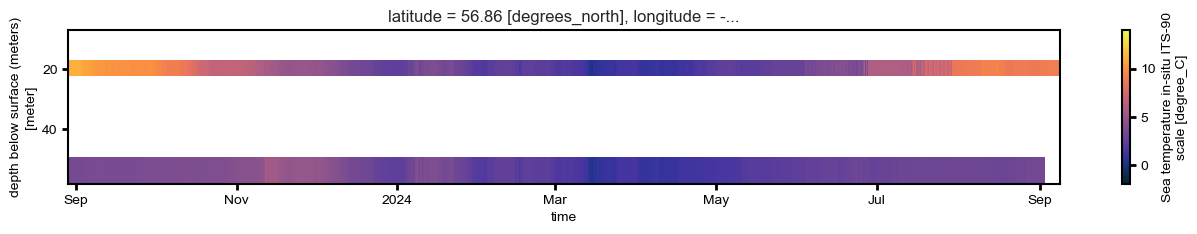

In [27]:
upper_temp = mfd_up.temperature.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.temperature.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=14,cmap=cmocean.cm.thermal)

## Chlorophyll Hourly Interpolated Plots

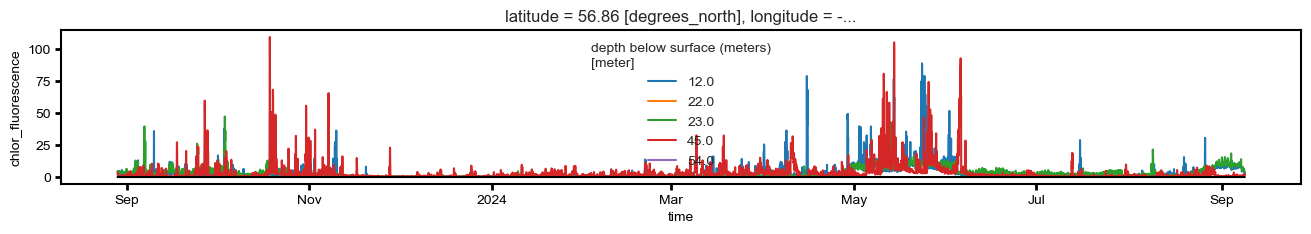

In [28]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.chlor_fluorescence.plot(x="time",hue="depth",ax=ax);
(mfd_up.isel({'depth':0}).chlor_fluorescence*0).plot(ax=ax,c='k',add_legend=False); #zeroline

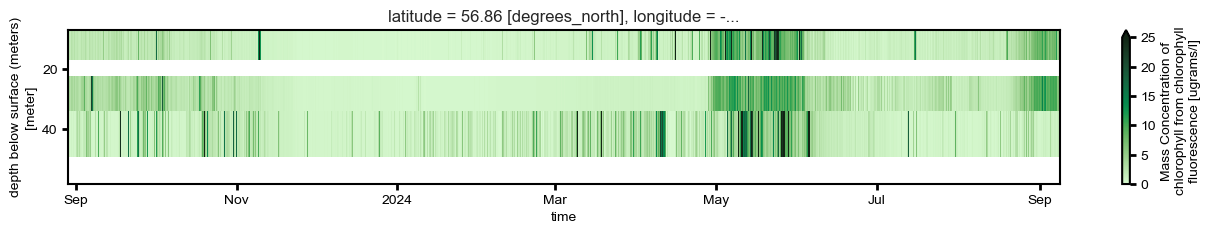

In [29]:
upper = 25
lower = 0

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.chlor_fluorescence.T.plot(ax=ax,yincrease=False,vmin=lower,vmax=upper,cmap=cmocean.cm.algae)

## Compare Timeseries to CTD Casts


- Recovery CTDXXX on Sikuliaq cruise, not yet obtained.

In [ ]:
import EcoFOCIpy.io.erddap as erddap

In [ ]:
url = "http://ecofoci-field.pmel.noaa.gov:8082/erddap"

erddap.test_erddap_connection(url=url) #basic test for connection to internal server, no response is a good thing

In [ ]:
depcast = erddap.erddapCTDretrieve(url=url,cruiseid='aq2301',qclevel='preliminary',concastno='009')
reccast = erddap.erddapCTDretrieve(url=url,cruiseid='dy2410',qclevel='preliminary',concastno='008')

## QC Notes



(PJS needs to vet these)

## Generate to_edit files for PJS

- these are usually salinity focused and need the ctd casts as well as the salinity timeseries.
- save the native time scale, not the interpolated or upscaled version

In [20]:
with pd.ExcelWriter('23bs2c_salinity_to_edit.xlsx') as writer:  

    for depthkey in mfd.to_dataframe().salinity.groupby(level=[1]).groups.keys():
        if not (mfd.to_dataframe().salinity.groupby(level=[1]).get_group(depthkey).dropna(how='all')).empty:
            print(f'saving {depthkey}')
            (mfd.to_dataframe().salinity.groupby(level=[1]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))

    # depcast.to_excel(writer, sheet_name=depcast.profile_id.unique()[0])
    reccast.to_excel(writer, sheet_name=reccast.profile_id.unique()[0])

saving 56.8631
